In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the data from the given file
image_size = 28
num_images = 55000
f = gzip.open('train-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_images)

data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

data = data.reshape(num_images, image_size, image_size, 1)


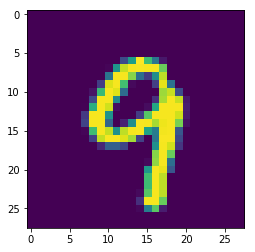

In [3]:
#pritning the images
image = np.asarray(data[550]).squeeze()

plt.imshow(image)
plt.show()

In [4]:
#storing the data in the form of matrix
Xa=np.asarray(data[:])
Xa=Xa.squeeze()
Xa=Xa.reshape(Xa.shape[0],Xa.shape[2]*Xa.shape[1])
Xa=Xa.T/255
Xa.shape

(784, 55000)

In [5]:
#knowing the no of features and the no of data points in the given array
m=Xa.shape[1]
n=Xa.shape[0]
print(m)
print(n)

55000
784


In [6]:
#loading the labels
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
Ya = np.zeros((1,m))
for i in range(0,54999):   
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    Ya[0,i]=labels
print(Ya[0,550]) 
print(Ya.shape)


9.0
(1, 55000)


In [7]:
Y1= np.zeros((10,m))
for i in range (0,m):
    for j in range(0,10):
        if(j==int(Ya[0,i])):
            Y1[j,i]=1
        else:
            Y1[j,i]=0
Ya=Y1            

In [8]:
#defining the no of nodes in each layer
n_L= int(input("Enter the no of layers : "))

Enter the no of layers : 1


In [9]:
#determining the architechure of the network
nodes=np.zeros((n_L+1,1),dtype=int)
nodes[0,0]=n
for i in range (1,n_L+1):
    nodes[i,0] = int(input("Enter the no of nodes in  layer) : "))


Enter the no of nodes in  layer) : 120


In [10]:
#initializing the weights and the biases
def define_W(nodes,i):
    W = np.random.randn(nodes[i,0],nodes[i-1,0])*0.01
    return W
def define_B(nodes,i):
    B = np.zeros((nodes[i,0],1))
    return B


In [11]:
#defining the weights
def params(n_L):
    parameters={}
    for i in range (1,n_L+1):
        #print(define_W((nodes),i))
        parameters["W"+str((i))] = define_W(nodes,i)
        parameters["B"+str((i))] = define_B(nodes,i)  
    #last layer for softmax function 
    parameters["W"+str(n_L+1)] = np.random.randn(10,nodes[n_L,0])*0.01
    parameters["B"+str(n_L+1)] = np.zeros((10,1))
    
    return parameters



In [12]:
#ReLU function
def ReLU(A):
    A = (np.abs(A)+A)/2
    return A
#softmax function
def softmax(Zl):
    p=np.exp(Zl)
    Z = p/np.sum(p, axis = 0,keepdims=True)
    return Z

In [13]:
def value():
    values = {}
    return values
def dparams():
    d = {}
    return d

In [15]:
def forward_prop(X,parameters,values):
    #values={}
    values["Z0"] = X
    for i in range(1,n_L+1):
        values["A"+str(i)] = np.dot(parameters["W"+str(i)],values["Z"+str(i-1)])+parameters["B"+str(i)]
        values["Z"+str(i)] = ReLU(values["A"+str(i)])    
    
    #defining the softmax function
    values["A"+str(n_L+1)] = parameters["B"+str(n_L+1)]+ np.dot(parameters["W"+str(n_L+1)],values["Z"+str(n_L)])
    values["Z"+str(n_L+1)] = softmax(values["A"+str(n_L+1)])
    Y_hat= values["Z"+str(n_L+1)]
    return values,Y_hat

In [17]:
#cost function
def costf(Y,values):
    cost = -1*(np.sum(Y * np.log(values["Z"+str(n_L+1)]))/m) 
    return cost     

In [18]:
def dif_RELU(Z):
    
    d = np.zeros((Z.shape))
    
    """"for i in range (0,p[0]):
        for j in range(0,p[1]):
            if Z[i,j]==0:
                d[i,j]=0
            else:
                d[i,j]=1"""
    d=(np.abs(Z)+Z)/(2*np.abs(Z))
            
    return d

In [19]:
#backpropagation algorithm
def backp(values,parameters,X,Y,dparameters):
    m=X.shape[1]
    dparameters["da"+str(n_L+1)]=values["Z"+str(n_L+1)]-Y
    dparameters["db"+str(n_L+1)]=1/m*(np.sum(dparameters["da"+str(n_L+1)],axis=1,keepdims=True))
    dparameters["dw"+str(n_L+1)]=1/m*((np.dot(dparameters["da"+str(n_L+1)],values["Z"+str(n_L)].T)))
    dparameters["dz"+str(n_L)]=np.dot(parameters["W"+str(n_L+1)].T,dparameters["da"+str(n_L+1)])
    i=n_L
    while(i>0):
        dparameters["da"+str(i)]=dparameters["dz"+str(i)]*dif_RELU(values["A"+str(i)])
        dparameters["db"+str(i)]=1/m*(np.sum(dparameters["da"+str(i)],axis=1,keepdims=True))
        dparameters["dw"+str(i)]=1/m*(np.dot(dparameters["da"+str(i)],values["Z"+str(i-1)].T))
        dparameters["dz"+str(i-1)]=np.dot(parameters["W"+str(i)].T,dparameters["da"+str(i)])
        i=i-1
    return dparameters
    

In [21]:
def up_para (values,dparameters,parameters):
        a=0.4
        for i in range (1,n_L+2):
            parameters["B"+str(i)] = parameters["B"+str(i)] - a*dparameters["db"+str(i)]
            parameters["W"+str(i)] = parameters["W"+str(i)] - a*dparameters["dw"+str(i)]
        return parameters       
            
    

In [22]:
costc=[]
ac=[]
ac1=[]

In [23]:
#testing accuracy
def acc(parameters,values,X,Y):
    df = pd.read_csv('mnist_test.csv',header = None)
    data = np.array(df)
    X_test = (data[:,1:].transpose())/255
    Y_test = data[:,0:1].transpose()
    accuracy = 0
    m_test = X_test.shape[1]
    predict = np.zeros((1,m_test))
    values, A_test = forward_prop(X_test,parameters,values)
    for i in range(m_test):
        max = 0
        for j in range(10):
            if A_test[j,i] > max:
                max = A_test[j,i]
                max_index = j
            predict[0,i] = max_index
        if predict[0,i] == Y_test[0,i]:
            accuracy = accuracy + 1
    accuracy = (accuracy/m_test)*100
    #print("testing set accuracy",accuracy,"%")
    index = 0
    ac.append(accuracy)
    return(accuracy)

In [24]:
#accuracy on the training samle

def acc1 (parameters,values,X,Y):
    accuracy=0
    m_test = X.shape[1]
    values, A_test = forward_prop(X,parameters,values)
    for i in range(m_test):
        max = 0
        for j in range(10):
            if A_test[j,i] > max:
                max = A_test[j,i]
                max_index = j
        if Y[max_index,i]==1:
            accuracy = accuracy + 1
    accuracy = (accuracy/m_test)*100
    #print("training set accuracy",accuracy,"%")
    index = 0
    ac1.append(accuracy)
    return(accuracy)

In [25]:
#final application

def xy():
    Y=Ya
    X=Xa
    return X,Y
def train():
    X,Y=xy()
    parameters = params(n_L)
    dparameters = dparams()
    values = value()

    for i in range (0,2000):

        values,Y_hat = forward_prop(X,parameters,values) 
        dparameters = backp(values,parameters,X,Y,dparameters)
        parameters = up_para (values,dparameters,parameters)
        
        if i%50==0:
            cost1=costf(Y_hat,values)
            costc.append(cost1)
            c= acc(parameters,values,X,Y)
            c1= acc1(parameters,values,X,Y)
            print(i,": step")
            print(cost1)

            print("testing set accuracy",c1,"%")
            print("training set accuracy",c,"%")

In [26]:
train()

0 : step
2.30255807995
testing set accuracy 21.82181818181818 %
training set accuracy 22.189999999999998 %
50 : step
0.819177901642
testing set accuracy 82.77818181818182 %
training set accuracy 83.55 %
100 : step
0.494646345014
testing set accuracy 89.17454545454545 %
training set accuracy 89.98 %
150 : step
0.40952387076
testing set accuracy 90.98181818181818 %
training set accuracy 91.5 %
200 : step
0.367915425729
testing set accuracy 91.89272727272727 %
training set accuracy 92.36 %
250 : step
0.339035760392
testing set accuracy 92.5709090909091 %
training set accuracy 93.02 %
300 : step
0.316457962876
testing set accuracy 93.14727272727272 %
training set accuracy 93.51 %
350 : step
0.297068124725
testing set accuracy 93.66181818181818 %
training set accuracy 93.82000000000001 %
400 : step
0.280206219315
testing set accuracy 94.0909090909091 %
training set accuracy 94.14 %
450 : step
0.265412912595
testing set accuracy 94.4909090909091 %
training set accuracy 94.48 %
500 : step
0.2

KeyboardInterrupt: 

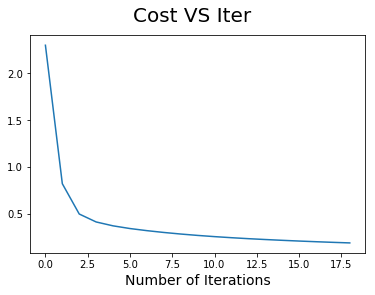

In [42]:
fig = plt.figure()
fig.suptitle('Cost VS Iter', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(costc)

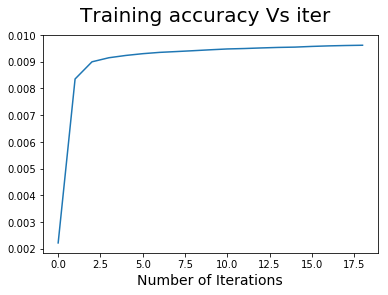

In [40]:
fig = plt.figure()
fig.suptitle('Training accuracy Vs Iter', fontsize=20)
plt.xlabel('Number of Iterations', fontsize=14)
plt.plot(ac)